In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [102]:
NUM_TRIALS = 10000
EPS = 0.1
b = 2
c = 1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

def decaying_eps(t) :
    return EPS / np.log(b * t + c)

In [104]:
class Bandit :
    def __init__(self, p) :
        #p : win rate
        self.p = p
        self.p_estimate = 0
        self.N = 0 #no of samples
        
    def pull(self) :
        #draws a 1 with probabilty p
        return np.random.random() < self.p
    
    def update(self, x) :
        self.N = self.N + 1
        self.p_estimate = ((self.N - 1) * self.p_estimate + x) / self.N
        
def exeriment() :
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

    rewards = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax([b.p for b in bandits])
    print(f'optimal_j : {optimal_j}')

    for i in range(NUM_TRIALS) :

        #use greedy epsilon to select the next bandit
        if np.random.random() < decaying_eps(i + 1) :
            num_times_explored += 1
            j = np.random.choice(list(range(len(bandits))))  #j is the index of the predicted optimal bandit
        else :
            num_times_exploited += 1
            j = np.argmax([b.p_estimate for b in bandits])

        if j == optimal_j :
            num_optimal += 1
        #pull the arm of the bandit with the largest sample
        x = bandits[j].pull()

        #update the rewards log
        rewards[i] = x

        #update the distribution for the bandit arm we just pulled
        bandits[j].update(x)
        
    #printing mean estimates of each bandit
    for b in bandits :
        print(f'Mean estimate : {b.p_estimate}')
        
    #total reward
    print(f'Total reward earned : {rewards.sum()}')
    print(f'Overall win rate : {rewards.sum() / NUM_TRIALS}')
    print(f'Number of times explored : {num_times_explored}')
    print(f'Number of times exploited : {num_times_exploited}')
    print(f'Number of times selected optimal bandit : {num_optimal}')
    
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBABILITIES))
    plt.show()

optimal_j : 2
Mean estimate : 0.22872340425531917
Mean estimate : 0.3888888888888889
Mean estimate : 0.7468289689034364
Total reward earned : 7358.0
Overall win rate : 0.7358
Number of times explored : 117
Number of times exploited : 9883
Number of times selected optimal bandit : 9776


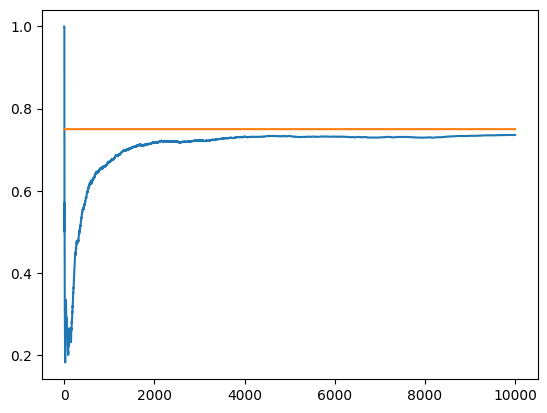

In [107]:
if __name__ == '__main__' :
    exeriment()